<img src = coverpage.png />

# Pandas

Pandas adalah sebuah librari berlisensi BSD dan open source yang menyediakan struktur data dan analisis data yang mudah digunakan dan berkinerja tinggi untuk bahasa pemrograman Python. Struktur data dasar pandas dinamakan DataFrame, yaitu sebuah koleksi kolom berurutan dengan nama dan jenis, dengan demikian merupakan sebuah tabel yang tampak seperti database dimana sebuah baris tunggal mewakili sebuah contoh tunggal dan kolom mewakili atribut tertentu.

Pada modul ini akan membahas 3 tipe data yang terbentuk dalam library pandas, yaitu :
1. Series
2. Data frame
3. Data Kosong (NaN)

In [1]:
import numpy as np
import pandas as pd

## Series

Series sangat mirip dengan array NumPy (sebenarnya dibangun di atas objek array NumPy). Apa yang membedakan array NumPy dari series, adalah bahwa series dapat memiliki label sumbu, yang berarti dapat diindeks oleh label, bukan hanya indeks berupa nomor/angka 0 s/d n.

Untuk format penulisan syntax series adalah -> pd.Series( 'data' , 'index/label' ), untuk lebih jelasnya bisa dilihat pada contoh dibawah ini.

In [2]:
#membuat variabel untuk label dan isian data
labels = ['a','b','c']
my_list = [11,25,37]
arr = np.array([10,20,30])
d = {'a':1,'b':2,'c':3}

In [3]:
#menggunakan isian dari list
pd.Series(my_list)

0    11
1    25
2    37
dtype: int64

In [4]:
pd.Series(my_list,labels)

a    11
b    25
c    37
dtype: int64

In [5]:
#menggunakan isian dari array
pd.Series(arr)

0    10
1    20
2    30
dtype: int32

In [6]:
pd.Series(arr,labels)

a    10
b    20
c    30
dtype: int32

In [7]:
#menmbuat series dari dictionary
pd.Series(d)

a    1
b    2
c    3
dtype: int64

## Data Frame

Data frame yaitu sebuah koleksi kolom berurutan dengan nama dan jenis, dengan demikian merupakan sebuah tabel yang tampak seperti database dimana sebuah baris tunggal mewakili sebuah contoh tunggal dan kolom mewakili atribut tertentu. Harus dicatat di sini bahwa elemen dalam berbagai kolom mungkin berapa jenis yang berbeda. Data frame juga bisa dibilang sebagai gabungan dari 2 atau lebih Series seperti ilustrasi dibawah ini.

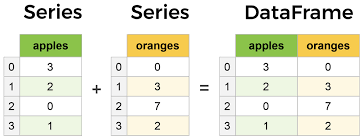

Dengan adanya fitur dataframe memudahkan untuk membaca sebuah file dan menjadikannya table, kita juga dapat mengolah suatu data dengan menggunakan operasi seperti join, distinct, group by, agregasi, dan teknik lainnya yang terdapat pada SQL. Banyak format file yang dapat dibaca menggunakan Pandas, seperti file .txt, .csv, .tsv dan lainnya.

Syntax umum membuat data frame yaitu -> pd.DataFrame( 'isian data' , 'index/label' , 'colom' )

In [8]:
#membuat dataframe
data = pd.DataFrame(np.random.randn(5,4),
                    index='A B C D E'.split(),
                    columns='W X Y Z'.split())

In [9]:
data

,W,X,Y,Z
A,-1.846495,-0.320971,-0.725434,-0.967314
B,-0.171329,-0.304802,0.763991,-0.047478
C,-0.945343,-0.521526,0.999870,0.220298
D,-0.860445,-0.184837,-0.167988,-0.481762
E,-1.415819,-0.649598,-1.012776,1.113305


### Selection dan Indexing sebuah data frame

In [10]:
#memanggil data satu kolom
data['W']

A   -1.846495
B   -0.171329
C   -0.945343
D   -0.860445
E   -1.415819
Name: W, dtype: float64

In [11]:
#memanggil data satu baris
data.loc['A']

W   -1.846495
X   -0.320971
Y   -0.725434
Z   -0.967314
Name: A, dtype: float64

In [12]:
#memanggila data multi kolom
data[['W','Y']]

,W,Y
A,-1.846495,-0.725434
B,-0.171329,0.763991
C,-0.945343,0.999870
D,-0.860445,-0.167988
E,-1.415819,-1.012776


In [13]:
#memanggila data multi baris
data.loc[['B','C']]

,W,X,Y,Z
B,-0.171329,-0.304802,0.763991,-0.047478
C,-0.945343,-0.521526,0.999870,0.220298


In [14]:
#memanggil data tunggal
data['X']['D']

-0.18483666966862816

In [15]:
#memanggil sebagian data
data.loc[['A','B','D'],['X','Z']]

,X,Z
A,-0.320971,-0.967314
B,-0.304802,-0.047478
D,-0.184837,-0.481762


### Conditional Selection

In [16]:
data

,W,X,Y,Z
A,-1.846495,-0.320971,-0.725434,-0.967314
B,-0.171329,-0.304802,0.763991,-0.047478
C,-0.945343,-0.521526,0.999870,0.220298
D,-0.860445,-0.184837,-0.167988,-0.481762
E,-1.415819,-0.649598,-1.012776,1.113305


In [17]:
#mengecek data yang nilainya lebih dari 0 dengan output boolean
data>0

,W,X,Y,Z
A,False,False,False,False
B,False,False,True,False
C,False,False,True,True
D,False,False,False,False
E,False,False,False,True


In [18]:
#menampilkan dan menyeleksi data yang nilainya lebih dari 0
data[data>0]

,W,X,Y,Z
A,NaN,NaN,NaN,NaN
B,NaN,NaN,0.763991,NaN
C,NaN,NaN,0.999870,0.220298
D,NaN,NaN,NaN,NaN
E,NaN,NaN,NaN,1.113305


### Menambah dan Menghapus Baris/Kolom

untuk menambah kolom atau baris pada dataframe cukup mudah yaitu dengan membuat variabel index/kolom baru, kemudian untuk menghapus kolom yaitu dengan menggunakan rumus syntax -> namadataframe.drop('namakolom',axis=1,inplace=True). Untuk menghapus baris yaitu dengan menggunakan rumus syntax -> namadataframe.drop('namabaris',axis=0,inplace=True).

catatan :

- jumlah kolom/baris yang ditambahkan harus sama dengan format ukuran awal
- inplace berisikan boolean, jika True maka dihapus permanen dan jika False atau tidak ditulis hanya dihapus sementara.
- axis = 1 untuk kolom dan axis = 0 untuk baris

In [19]:
#menambah kolom
data['kolom baru']=[1,2,3,4,5]

In [20]:
data

,W,X,Y,Z,kolom baru
A,-1.846495,-0.320971,-0.725434,-0.967314,1
B,-0.171329,-0.304802,0.763991,-0.047478,2
C,-0.945343,-0.521526,0.999870,0.220298,3
D,-0.860445,-0.184837,-0.167988,-0.481762,4
E,-1.415819,-0.649598,-1.012776,1.113305,5


In [21]:
#menghapus kolom
data.drop('kolom baru',axis=1,inplace=True)

In [22]:
data

,W,X,Y,Z
A,-1.846495,-0.320971,-0.725434,-0.967314
B,-0.171329,-0.304802,0.763991,-0.047478
C,-0.945343,-0.521526,0.999870,0.220298
D,-0.860445,-0.184837,-0.167988,-0.481762
E,-1.415819,-0.649598,-1.012776,1.113305


In [23]:
#menambah baris
data.loc['F']=[4,5,6,7]

In [24]:
data

,W,X,Y,Z
A,-1.846495,-0.320971,-0.725434,-0.967314
B,-0.171329,-0.304802,0.763991,-0.047478
C,-0.945343,-0.521526,0.999870,0.220298
D,-0.860445,-0.184837,-0.167988,-0.481762
E,-1.415819,-0.649598,-1.012776,1.113305
F,4.000000,5.000000,6.000000,7.000000


In [25]:
data.drop('F',axis=0,inplace=True)

In [26]:
data

,W,X,Y,Z
A,-1.846495,-0.320971,-0.725434,-0.967314
B,-0.171329,-0.304802,0.763991,-0.047478
C,-0.945343,-0.521526,0.999870,0.220298
D,-0.860445,-0.184837,-0.167988,-0.481762
E,-1.415819,-0.649598,-1.012776,1.113305


# Data Kosong (NaN)

Data kosong atau biasa dikenal dengan NaN merupakan sebuah data yang tidak memiliki value, dimana NaN ini dapat mengganggu proses analisis data. Oleh karena itu, ada beberapa solusi untuk mengatasinya yaitu dengan cara :

- menghapus kolom yang memiliki nilai kosong
- menghapus baris yang memiliki nilai kosong
- mengisi nilai NaN pada data frame

In [27]:
#membuat sample data frame dengan data kosong
df = pd.DataFrame({'A':[1,2,np.nan],
                  'B':[5,np.nan,np.nan],
                  'C':[1,2,3]})

In [28]:
df

,A,B,C
0,1.0,5.0,1
1,2.0,NaN,2
2,NaN,NaN,3


In [29]:
#menghapus kolom yang memiliki nilai kosong
df.dropna(axis=1)

,C
0,1
1,2
2,3


In [30]:
#menghapus baris yang memiliki nilai kosong
df.dropna(axis=0)

,A,B,C
0,1.0,5.0,1


In [31]:
#mengisi nilai NaN pada data frame dengan nilai tertentu, contoh : 100
df.fillna(value='100')

,A,B,C
0,1,5,1
1,2,100,2
2,100,100,3


## Selamat Mencoba